In [1]:
#univariate account data puller

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm


In [3]:
#tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2019-10-01'
end_date = '2020-1-17'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
#panel_data = data.DataReader('INFY', 'yahoo-dividends', start_date, end_date)

panel_data = data.DataReader('INFY', 'yahoo', start_date, end_date)

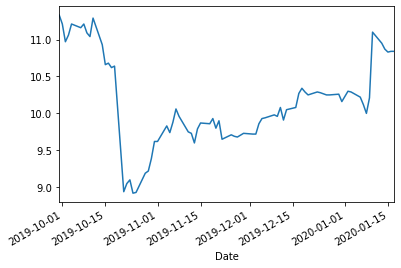

In [6]:
panel_data.Open.plot()

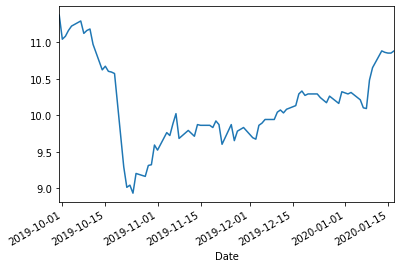

In [9]:
panel_data.Close.plot()

In [10]:
panel_data.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.987452,0.991722,0.989178,-0.155181,0.983797
Low,0.987452,1.000000,0.990881,0.992386,-0.273855,0.991522
Open,0.991722,0.990881,1.000000,0.980952,-0.210431,0.978770
Close,0.989178,0.992386,0.980952,1.000000,-0.227820,0.997277
Volume,-0.155181,-0.273855,-0.210431,-0.227820,1.000000,-0.269066
Adj Close,0.983797,0.991522,0.978770,0.997277,-0.269066,1.000000


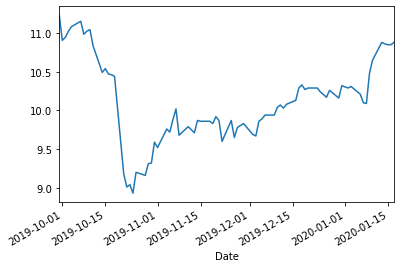

In [11]:
panel_data['Adj Close'].plot()

In [ ]:
#Multi Accounts data puller 

In [2]:
#indexes of accounts
df_index = pd.read_csv(r'C:\Users\anike\Downloads\personal_work\Stock_market_pred\index_dataset.csv', encoding = 'ISO-8859-1')

In [3]:
df_index_india = df_index[df_index['Country']=='India']

In [4]:
df_index_india.shape

(8984, 5)

In [5]:
test = df_index_india.Ticker.to_list()

In [6]:
len(test)

8984

In [7]:
import random 
test_10_random = random.choices(test, k=20)


In [8]:
test_10 = test[:50]

In [9]:
import calendar as cal
import datetime as dt
import re
import time
import warnings

import pandas as pd
import requests

try:
    from io import StringIO
except ImportError:
    from StringIO import StringIO


class Fetcher:
    api_url = (
        "https://query1.finance.yahoo.com/v7/finance/download/%s?period1=%s&period2=%s&interval=%s&events=%s&crumb=%s"
    )

    def __init__(self, ticker,start=None, end=None, interval="1d"):
        """Initializes class variables and formats api_url string"""
        
        self.ticker = ticker.upper()
        self.interval = interval
        self.cookie, self.crumb = self.init()
        self.start = int(cal.timegm(dt.datetime(2019,10,31).timetuple()))

        if end is not None:
            self.end = int(cal.timegm(dt.datetime(*end).timetuple()))
        else:
            self.end = int(time.time())

    def init(self):
        """Returns a tuple pair of cookie and crumb used in the request"""
        url = "https://finance.yahoo.com/quote/%s/history" % (self.ticker)
        r = requests.get(url)
        txt = r.content
        cookie = r.cookies["B"]
        pattern = re.compile('.*"CrumbStore":\{"crumb":"(?P<crumb>[^"]+)"\}')

        for line in txt.splitlines():
            m = pattern.match(line.decode("utf-8"))
            if m is not None:
                crumb = m.groupdict()["crumb"]
                crumb = crumb.replace(u"\\u002F", "/")
        return cookie, crumb  # return a tuple of crumb and cookie

    def _get(self, events):
        if self.interval not in ["1d", "1wk", "1mo"]:
            raise ValueError("Incorrect interval: valid intervals are 1d, 1wk, 1mo")

        url = self.api_url % (self.ticker, self.start, self.end, self.interval, events, self.crumb)

        data = requests.get(url, cookies={"B": self.cookie})
        content = StringIO(data.content.decode("utf-8"))
        return pd.read_csv(content, sep=",")

    def getData(self, events):
        """Returns a list of historical data from Yahoo Finance"""
        warnings.warn("getData has been deprecated, use get_data instead", DeprecationWarning)
        return self._get(events)

    def getHistorical(self):
        """Returns a list of historical price data from Yahoo Finance"""
        warnings.warn("getHistorical has been deprecated, use get_historical instead", DeprecationWarning)
        return self._get("history")

    def getDividends(self):
        """Returns a list of historical dividends data from Yahoo Finance"""
        warnings.warn("getDividends has been deprecated, use get_dividends instead", DeprecationWarning)
        return self._get("div")

    def getSplits(self):
        """Returns a list of historical splits data from Yahoo Finance"""
        warnings.warn("getSplits has been deprecated, use get_splits instead", DeprecationWarning)
        return self._get("split")

    def getDatePrice(self):
        """Returns a DataFrame for Date and Price from getHistorical()"""
        warnings.warn("getDatePrice has been deprecated, use get_date_price instead", DeprecationWarning)
        return self.getHistorical().iloc[:, [0, 4]]

    def getDateVolume(self):
        """Returns a DataFrame for Date and Volume from getHistorical()"""
        warnings.warn("getDateVolume has been deprecated, use get_date_volume instead", DeprecationWarning)
        return self.getHistorical().iloc[:, [0, 6]]

    def get_historical(self):
        """PEP8 friendly version of deprecated getHistorical function"""
        return self._get("history")

    def get_dividends(self):
        """PEP8 friendly version of deprecated getDividends function"""
        return self._get("div")

    def get_splits(self):
        """PEP8 friendly version of deprecated getSplits function"""
        return self._get("split")

    def get_date_price(self):
        """PEP8 friendly version of deprecated getDatePrice function"""
        return self.get_historical().iloc[:, [0, 4]]

    def get_date_volume(self):
        """PEP8 friendly version of deprecated getDateVolume function"""
        return self.get_historical().iloc[:, [0, 6]]

In [31]:
key_error = []
df_test = []
for i in test_10:
    try:
        fetch = (Fetcher(i))
        df_test.append(fetch.getData(""),)
    except KeyError:
        key_error.append(i)
        print("skipped the key",i)
        continue

    #print("index : " ,i ,fetch.getData(""),)


C:\Users\anike\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: DeprecationWarning: getData has been deprecated, use get_data instead


skipped the key MDRNSUT-B.BO


In [26]:
# df['Daily Lag'] = df['Close'].shift(1)

# df['Daily Returns'] = (df['Daily Lag']/df['Close']) -1

len(df_test[26].columns)

3

In [27]:
test_10[26]

'VIPULDYE.BO'

In [28]:
fetch = Fetcher('VIPULDYE.BO')
fetch.getData("")

C:\Users\anike\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: DeprecationWarning: getData has been deprecated, use get_data instead


,"{""chart"":{""result"":null","error:{""code"":""Not Found""","description:""Encountered an error when generating the download data""}}}"


In [32]:
for i in range(len(df_test)):
    try:
        df_test[i]['Daily_Lag']=df_test[i]['Close'].shift(1)
        df_test[i]['Daily Returns'] = (df_test[i]['Daily_Lag']/df_test[i]['Close']) -1
    except KeyError:
        key_error.append(test_10[i])
        print(i)    

26
34


In [38]:
for i in key_error: 
    try: 
        test_10.remove(i) 
    except ValueError: 
        pass

In [40]:
#test_10

In [41]:
key_check = []
df_test = []
for i in test_10:
    try:
        fetch = (Fetcher(i))
        df_test.append(fetch.getData(""),)
    except KeyError:
        key_check.append(i)
        print("skipped the key",i)
        continue

C:\Users\anike\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: DeprecationWarning: getData has been deprecated, use get_data instead


In [42]:
key_check

[]

In [43]:
for i in range(len(df_test)):
    try:
        df_test[i]['Daily_Lag']=df_test[i]['Close'].shift(1)
        df_test[i]['Daily Returns'] = (df_test[i]['Daily_Lag']/df_test[i]['Close']) -1
    except KeyError:
        key_check.append(test_10[i])
        print(i)    

In [59]:

df_10 = pd.DataFrame()
for x,y in zip(range(len(test_10)),test_10):
    df_10[y] = df_test[x]['Daily Returns']
    

In [61]:
df_10.index = df_test[0].Date

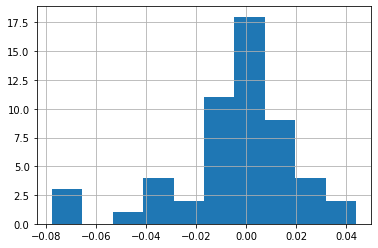

In [46]:
df_test[0]['Daily Returns'].hist()

In [47]:
# mean = df['Daily Returns'].mean()
# std = df['Daily Returns'].std()

In [63]:
df_10.fillna(0,inplace=True)

In [64]:
df_10 = df_10[1:]

In [65]:
df_10.shape

(54, 47)

In [66]:
from scipy import stats

In [67]:
df_mean_std = []
for x in df_10.columns:
    mean = df_10[x].mean()
    std = df_10[x].std()
    kurtosis = df_10[x].kurtosis()
    #z_score = stats.zscore(np.array(df_10[x]))
    temp = [mean,std,kurtosis]
    
    
    
    df_mean_std.append(temp)
    
    
    

In [68]:
z_score = stats.zscore(np.array(df_10['ISHITADR.BO']))

In [69]:
#using z_distribution

min_length = (df_10.shape[0])*3/4
print(min_length)

best_accounts_using_zscores = []

for x in df_10.columns:
    mean = df_10[x].mean()
    #print(mean)
    z_score = stats.zscore(np.array(df_10[x]))
    postive_zscore = [x for x in z_score if x > mean]
   # print(postive_zscore)
    if (len(postive_zscore) > min_length):
        best_accounts_using_zscores.append(x)




# print(len(best_accounts_using_zscores))
best_accounts_using_zscores

40.5


['ISHITADR.BO', 'KAUSHALYA.NS']

In [72]:
df_10.columns

Index(['BHARTIARTL.NS', 'ASHOKLEY.NS', 'AUROPHARMA.NS', 'AREXMIS.BO',
       'SANWARIA.NS', 'ALMONDZ.NS', 'ADINATH.BO', 'SBIN.NS', 'BPCL.NS',
       'MBECL.NS', 'MAHABANK.NS', 'DBCORP.BO', 'BOSCHLTD.NS', 'BHEL.BO',
       'IDBI.NS', 'IRB.BO', 'DABUR.NS', 'TCIDEVELOP.NS', 'NDTV.BO',
       'ISHITADR.BO', 'GDL.BO', 'DRREDDY.NS', 'DPSCLTD.NS', 'DLF.BO',
       'DEEPAKSP.BO', 'DANLAW.BO', 'VADIDAI.BO', 'TRIMURTHI.BO', 'THAKDEV.BO',
       'TATAMTRDVR.BO', 'SUPDF.BO', 'SHRIDINE.BO', 'RADHEDE.BO', 'PRABHAT.NS',
       'NDMETAL.BO', 'MANGALAM.BO', 'MAHLIFE.NS', 'LPDC.NS', 'KAUSHALYA.NS',
       'IRB.NS', 'INTERDIGI.BO', 'INDTONER.BO', 'INDLEASE.BO', 'HDIL.NS',
       'HDIL.BO', 'HDFC.NS', 'HDFC.BO'],
      dtype='object')

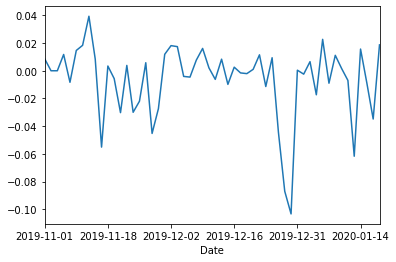

In [73]:
df_10['GDL.BO'].plot()


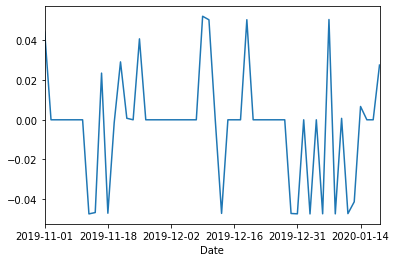

In [71]:
df_10['ISHITADR.BO'].plot()

In [161]:

# for x in df_10.columns:
    
#     kurtosis = df_10[x].kurtosis()
#     std = df_10[x].std()
#     postive_score = [x for x in z_score if x > mean]
#    # print(postive_zscore)
#     if (len(postive_zscore) > min_length):
#         best_accounts_using_zscores.append(x)

In [159]:
dict_index = dict(zip(test_10,df_mean_std))

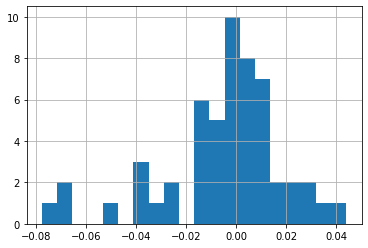

In [69]:
df_test[0]['Daily Returns'].hist(bins=20)

In [26]:
df_10.index = df_test[0].Date

In [28]:
df_10.index = pd.to_datetime( df_test[0].Date)